<a href="https://colab.research.google.com/github/PaleShineSuccess/illusionProject.py/blob/main/Primrose's_field_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 棋盤錯覺(Primrose's field)的復現
的稍微簡單一點點的版本

當前位置：

[Primrose's field]——————[Cafe Wall](https://colab.research.google.com/drive/14fJxykw9A7pYvA-Ek6btBhbbVJoTAKGT?usp=sharing)——————[Other](https://colab.research.google.com/drive/1Y1bwfP_Ind1DPlqS5dHePnJhfALpPEEi?usp=sharing)


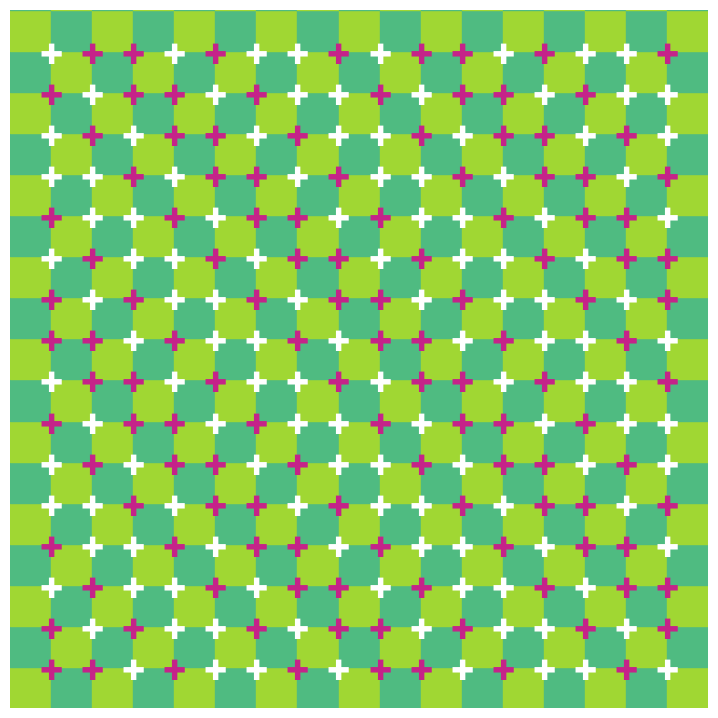

In [ ]:
#@title 原始/延伸（靜態）
#@markdown [原圖](https://www.ritsumei.ac.jp/~akitaoka/sakurasfs.jpg)

#@markdown credit：[Akiyoshi KITAOKA](https://www.ritsumei.ac.jp/~akitaoka/index-e.html)
#@markdown #選擇模式
#@markdown original為復現錯覺，使用原始色彩
#@markdown extended為延伸錯覺(換色)，可改顏色

mode = "extended" #@param ["original","extended"]
if mode == "original":
#@markdown ##original的顏色設定
#@markdown 小花顏色1，默認紫色(197,35,137)；

#@markdown 小花顏色2，默認白色(255)
  c1=(197, 35, 137)# @param {"type":"raw","placeholder":"(197, 35, 137)"}
  c2=(255, 255, 255)# @param {"type":"raw","placeholder":"(255, 255, 255)"}
#@markdown 棋盤顏色1，默認綠色(160,215,51)；

#@markdown 棋盤顏色2，默認靛色(79,187,129)
  color1 = (160, 215, 51)# @param {"type":"raw","placeholder":"(160, 215, 51)"}
  color2 = (79, 187, 129)# @param {"type":"raw","placeholder":"(79, 187, 129)"}
elif mode == "extended":
  #@markdown ##extended的顏色設定
  e1 = (0, 0, 0) # @param {"type":"raw","placeholder":"(0,0,0)"}
  e2 = (255, 255, 255) # @param {"type":"raw","placeholder":"(255,255,255)"}
  color1=e1
  color2=e2
  c1=color1
  c2=color2


import matplotlib.pyplot as plt
import numpy as np

#@markdown ##棋盤設定
#@markdown 行列數
checkerboard_rows = 17 # @param {type:"slider", min:1, max:50, step:1}
checkerboard_cols = checkerboard_rows #←修改這裡可以弄出非正方形
square_size = 8 #←這裡是【方塊大小】
#@markdown ##字符設定
#@markdown 顯示字符

#@markdown 可嘗試輸入任何文字看看效果😎，默認：✚
char_to_display = "✚" # @param {"type":"string","placeholder":"✚"}
font_size = 20 #←這裡是【字符大小】
dot_spacing = square_size #←這裡是【字符間距】
#@markdown ————————————————————————————

#@markdown 雖然其他如字符大小，間隔，方塊大小等也可以修改，但修改後大概率會錯位，於是移除了，感興趣的可以直接左邊代碼塊修改

def rgb_to_float(rgb):
    return tuple(color / 255 for color in rgb)

def draw_checkerboard(ax, rows, cols, size):
    # 定義顏色
    # 繪製方塊
    for row in range(rows):
        for col in range(cols):
            color = rgb_to_float(color1) if (row + col) % 2 == 0 else rgb_to_float(color2)
            square = plt.Rectangle((col * size, row * size), size, size, color=color)
            ax.add_artist(square)

checkerboard_rows=checkerboard_rows+1
x = checkerboard_rows - 2  # 每行顯示的字符數量
max_rows = checkerboard_rows - 2  # 最大顯示的字符行數


# 圖像設置
width = x * dot_spacing + square_size  # 根據使用者定義的字符數量設置寬度
height = min(max_rows, checkerboard_rows) * dot_spacing + square_size  # 根據最大行數設置高度

# 定義顏色模式（使用 RGB 代碼）
pattern = '0110100101101001'
colors = [c1 if bit == '1' else c2 for bit in pattern]  # 粉色和白色

# 創建圖像
fig, ax = plt.subplots(figsize=(width / 15, height / 15))

# 繪製棋盤
draw_checkerboard(ax, checkerboard_rows, checkerboard_cols, size=square_size)

# 繪製字符
for row in range(min(max_rows, checkerboard_rows)):  # 限制行數
    for col in range(x):  # 只顯示前 x 個字符
        if col < checkerboard_cols:  # 確保不超出列數
            x_coord = (col) * dot_spacing + dot_spacing / 2 + 4  # 每行字符前移一位
            y_coord = height - (row * dot_spacing) - dot_spacing / 2 - 4.95  # 調整 y 坐標

            # 根據行數計算顏色，實現每行後移一位
            color_index = (col - row) % len(colors)
            color = rgb_to_float(colors[color_index])  # 將 RGB 轉換為浮點數

            # 使用 text 方法顯示字符
            ax.text(x_coord, y_coord, char_to_display, fontsize=font_size, ha='center', va='center', color=color)

# 設置坐標軸
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
ax.axis('off')  # 不顯示坐標軸

# 顯示圖像
plt.show()


# 延伸錯覺的加強

經觀察，原始錯覺在觀看者移動時，錯覺效果會加強

而延伸錯覺在更換顏色後，錯覺效果似乎被削弱了，於是試圖人不動山動，讓延伸錯覺動起來加強錯覺效果


第一次做作品時還比較青澀，不知道如何在colab直接做動畫，只能將生成的圖片保存，修改，放進matplotlib表格製成動畫，因此

【執行該代碼會出現4張圖，請忽略前2張，直接觀看第三張】




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


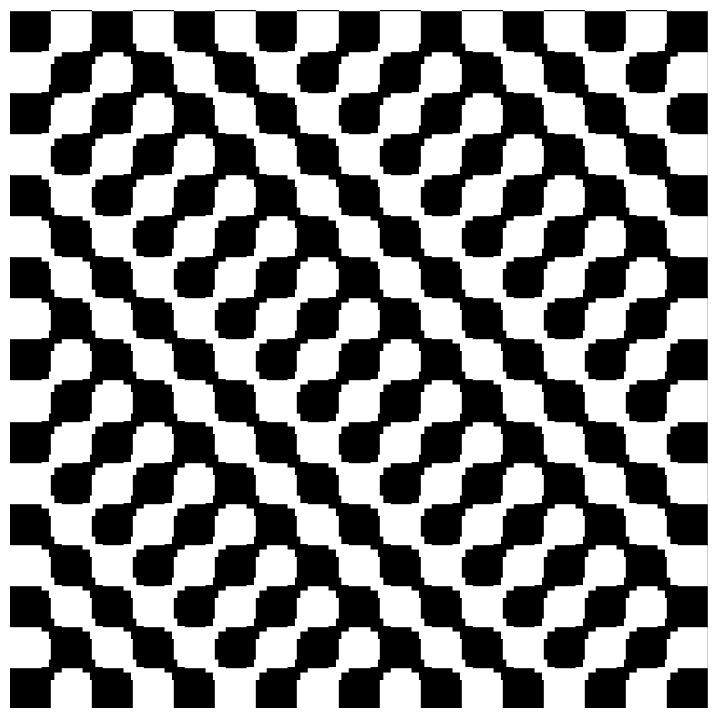

(694, 667, 3)


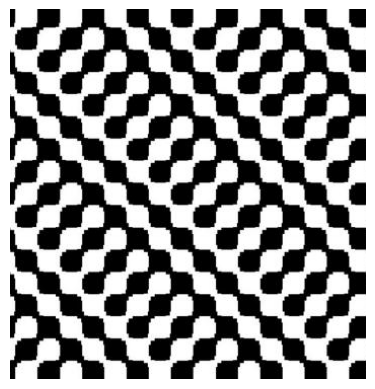

In [ ]:
#@title 延伸錯覺的動畫
#@markdown #※會需要加載google drive※
#@markdown   .
#@markdown ###移動方向
#@markdown 如箭頭所示

move = "→" # @param ["←","→"]
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2
from matplotlib.animation import FuncAnimation

drive.mount('/content/drive')   # 掛載 Google Drive
c1=(197, 35, 137)
c2=(255, 255, 255)
color1 = (160, 215, 51)
color2 = (79, 187, 129)
pink=(255, 105, 180)
color2=c2
c1=(0,0,0)
color1=c1
#c2=color1
def rgb_to_float(rgb):
    return tuple(color / 255 for color in rgb)
def draw_checkerboard(ax, rows, cols, size):
    # 定義顏色
    # 繪製方塊
    for row in range(rows):
        for col in range(cols):
            color = rgb_to_float(color1) if (row + col) % 2 == 0 else rgb_to_float(color2)
            square = plt.Rectangle((col * size, row * size), size, size, color=color)
            ax.add_artist(square)
checkerboard_rows = 18  # 行數
checkerboard_cols = checkerboard_rows  # 列數
square_size = 8  # 方格大小
x = checkerboard_rows - 2  # 每行顯示的字符數量
max_rows = checkerboard_rows - 2  # 最大顯示的字符行數
char_to_display = '✚'  # 顯示的字符
font_size = 20  # 字符大小
dot_spacing = 8  # 字符間距
width = x * dot_spacing + square_size  # 根據使用者定義的字符數量設置寬度
height = min(max_rows, checkerboard_rows) * dot_spacing + square_size  # 根據最大行數設置高度
pattern = '0110100101101001'
colors = [c1 if bit == '1' else c2 for bit in pattern]  # 粉色和白色
fig, ax = plt.subplots(figsize=(width / 15, height / 15))
draw_checkerboard(ax, checkerboard_rows, checkerboard_cols, size=square_size)
for row in range(min(max_rows, checkerboard_rows)):  # 限制行數
    for col in range(x):  # 只顯示前 x 個字符
        if col < checkerboard_cols:  # 確保不超出列數
            x_coord = (col) * dot_spacing + dot_spacing / 2 + 4  # 每行字符前移一位
            y_coord = height - (row * dot_spacing) - dot_spacing / 2 - 4.95  # 調整 y 坐標
            color_index = (col - row) % len(colors)
            color = rgb_to_float(colors[color_index])  # 將 RGB 轉換為浮點數
            ax.text(x_coord, y_coord, char_to_display, fontsize=font_size, ha='center', va='center', color=color)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
ax.axis('off')
# 顯示圖像
# 保存圖片到 Google Drive
save_path = '/content/drive/MyDrive/test1.jpg'
plt.savefig(save_path,bbox_inches='tight', pad_inches =- 0.02 ) # 注意两个参数

plt.show(block=False)

image_path = "/content/drive/MyDrive/test1.jpg"
r = cv2.imread(image_path)
cv2.imwrite('test_image.jpg', r)

x = 27
y = 0
w = 745
h = 775

# 读取图像
image = cv2.imread('test_image.jpg')

# 裁剪图像
cropped_image = image[y:y+h, x:x+w]

# 在图像的左上角添加红色字母"A"
font = cv2.FONT_HERSHEY_SIMPLEX  # 字体
text = ''  # 要添加的文字
font_scale = 1  # 字体大小缩放因子，20的大小会适应
thickness = 5  # 字体厚度
color = (0, 0, 255)  # 红色 (BGR格式)
position = (10, 30)  # 文字的左上角位置

# 在图像上添加文字
cv2.putText(cropped_image, text, position, font, font_scale, color, thickness)
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
print(cropped_image.shape)

# 保存图像
plt.savefig("/content/drive/MyDrive/test2.jpg", bbox_inches='tight', pad_inches=-0.02)

plt.show(block=False)

# 讀取圖片
img = plt.imread('/content/drive/MyDrive/test2.jpg')

# 設置圖形
fig, ax = plt.subplots()
ax.axis('off')  # 不顯示坐標軸
fig.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=None)
ax.set_frame_on(False)
image_display = ax.imshow(np.zeros_like(img), animated=True)
image_display.set_data(img)

# 設置圖像的初始位置
offset = 0

# 更新函數，實現圖片的移動
def update(frame):
    global offset
    # 水平移動圖片
    # 每次移動的距離，還有方向
    if move == "←":
      offset += 15
    elif move == "→":
      offset -= 15
    if offset > img.shape[1]:  # 如果圖片移出屏幕，重置位置
        offset = -img.shape[1]
    # Update the displayed image data by shifting the original image
    shifted_img = np.roll(img, offset, axis=1)
    image_display.set_data(shifted_img)
    extent = [offset, offset + img.shape[1], 0, img.shape[0]]
    image_display.set_extent(extent)
    return image_display,
# 動畫
ani = FuncAnimation(fig, update, frames=range(24), interval=50, blit=True)
from IPython.display import HTML
HTML(ani.to_jshtml())

當前位置：

[Primrose's field]——————[Cafe Wall](https://colab.research.google.com/drive/14fJxykw9A7pYvA-Ek6btBhbbVJoTAKGT?usp=sharing)——————[Other](https://colab.research.google.com/drive/1Y1bwfP_Ind1DPlqS5dHePnJhfALpPEEi?usp=sharing)